In [7]:
### Loading all of our modules at once
# Data storage methods and analysis toolkits
import pandas as pd
import numpy as np
import scipy
from scipy import stats

# Graphing
import matplotlib as mpl
import matplotlib.pyplot as plt

# Functions for the PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("CH4_N2O_Emissions.csv")
#print(df)

# Descriptive Statistics 
mean_CH4 = df["CH4 emission rate (ton per day)"].mean()
median_CH4 = df["CH4 emission rate (ton per day)"].median()
std_CH4 = df["CH4 emission rate (ton per day)"].std()

mean_N2O = df["N2O emission rate (ton per day)"].mean()
median_N2O = df["N2O emission rate (ton per day)"].median()
std_N2O = df["N2O emission rate (ton per day)"].std()

print("CH4 Emissions:")
print("Mean:", mean_CH4)
print("Median:", median_CH4)
print("Standard Deviation:", std_CH4)

print("\nN2O Emissions:")
print("Mean:", mean_N2O)
print("Median:", median_N2O)
print("Standard Deviation:", std_N2O)



CH4 Emissions:
Mean: 1.1398964738617021
Median: 0.1106515745
Standard Deviation: 2.8735313916098764

N2O Emissions:
Mean: 0.15472986349999998
Median: 0.0059716415
Standard Deviation: 0.4279950222518099


Text(0, 0.5, 'Frequency')

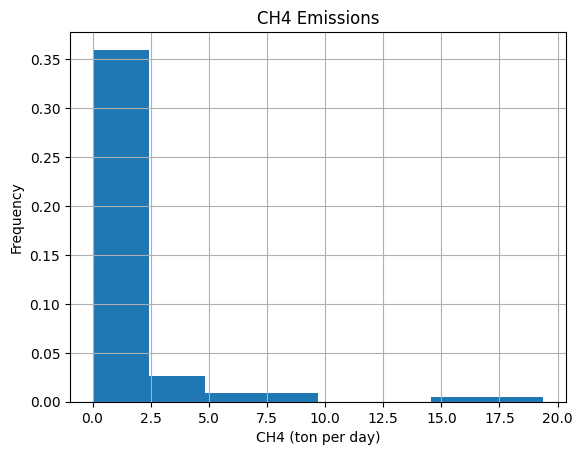

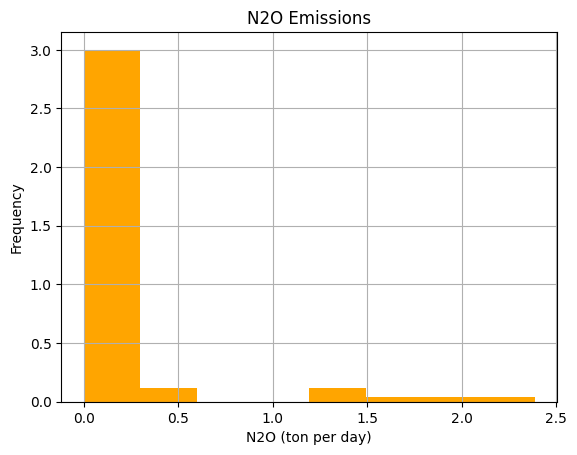

In [4]:
# Make histogram
df.hist("CH4 emission rate (ton per day)", bins=8, density=True)
plt.title("CH4 Emissions")
plt.xlabel("CH4 (ton per day)")
plt.ylabel("Frequency")

df.hist("N2O emission rate (ton per day)", color="orange", bins=8, density=True)
plt.title("N2O Emissions")
plt.xlabel("N2O (ton per day)")
plt.ylabel("Frequency")


Pearson Correlation Coefficient: 0.7782362832357747 p-value: 3.022531257712754e-18
Spearman Correlation Coefficient: 0.7388883264149033 p-value: 1.0278900551020851e-15


Slope: 0.1116185374597707
Intercept: 0.016662124136934603
R-value: 0.778236283235775
P-value: 3.0225312577124917e-18
Std error: 0.00994621645246214


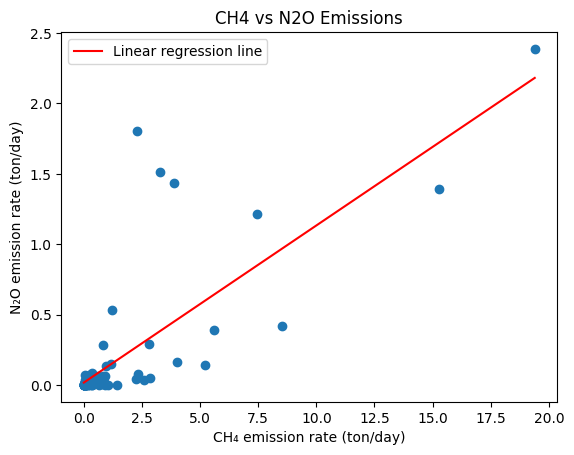

In [15]:
## Correlation

# Remove any value pairs that include an NaN in either column
df_clean = df[["CH4 emission rate (ton per day)", "N2O emission rate (ton per day)"]].dropna()

pearson_cc, pearson_p = stats.pearsonr(df_clean.iloc[:,0], df_clean.iloc[:,1])
spearman_cc, spearman_p = stats.spearmanr(df_clean.iloc[:,0], df_clean.iloc[:,1])

print("Pearson Correlation Coefficient:", pearson_cc, "p-value:", pearson_p)
print("Spearman Correlation Coefficient:", spearman_cc, "p-value:", spearman_p)
print("\n")

## Linear Regression

x = df_clean["CH4 emission rate (ton per day)"]
y = df_clean["N2O emission rate (ton per day)"]

regression = stats.linregress(x, y)

print("Slope:", regression.slope)
print("Intercept:", regression.intercept)
print("R-value:", regression.rvalue)
print("P-value:", regression.pvalue)
print("Std error:", regression.stderr)

plt.scatter(x,y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = regression.slope * x_line + regression.intercept
plt.plot(x_line, y_line, 'r', label="Linear regression line")
plt.xlabel("CH₄ emission rate (ton/day)")
plt.ylabel("N₂O emission rate (ton/day)")
plt.title("CH4 vs N2O Emissions")
plt.legend()
plt.show()

                                      PC1       PC2
CH4 emission rate (ton per day)  0.707107 -0.707107
N2O emission rate (ton per day)  0.707107  0.707107


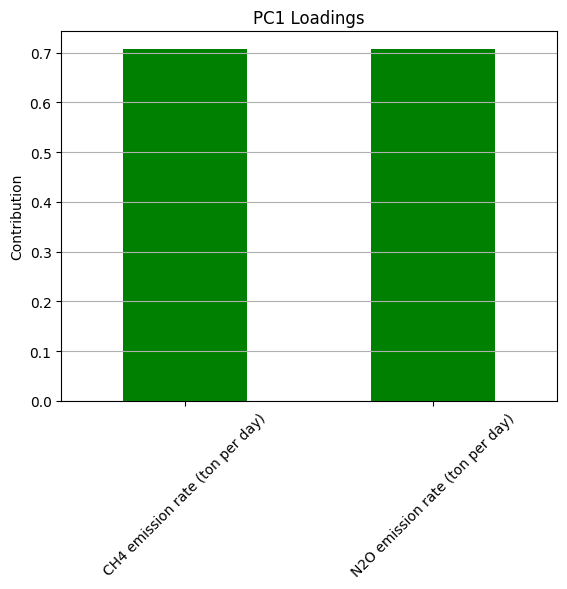

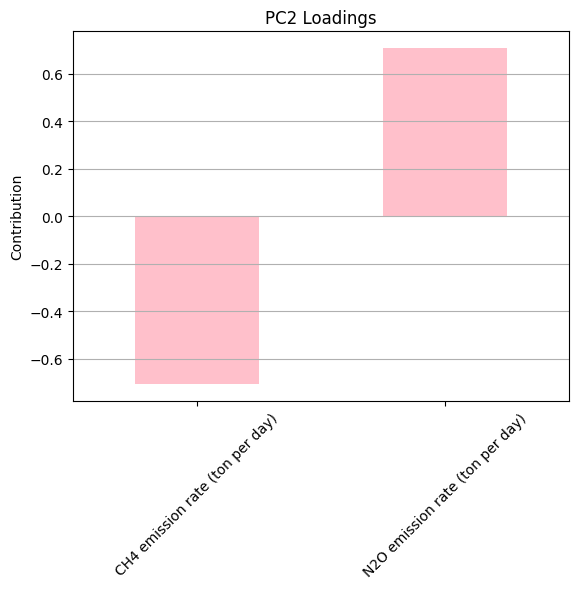

Explained variance ratio: [0.88911814 0.11088186]


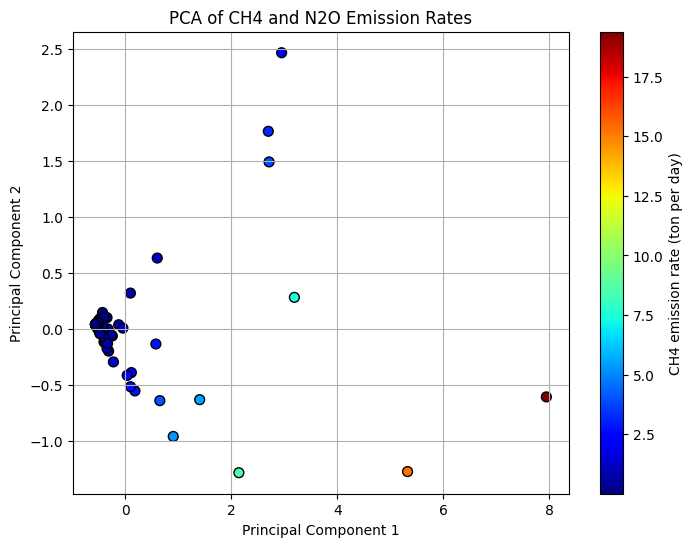

In [26]:
## PCA 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

pca = PCA(n_components=2)  # two PCs for two variables
principal_components = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])

loadings = pd.DataFrame(pca.components_.T, 
                        columns=["PC1", "PC2"], 
                        index=df_clean.columns)

print(loadings)

#PC1
plt.figure()
loadings["PC1"].plot(kind='bar', color='green')
plt.title("PC1 Loadings")
plt.ylabel("Contribution")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#PC2
plt.figure()
loadings["PC2"].plot(kind='bar', color='pink')
plt.title("PC2 Loadings")
plt.ylabel("Contribution")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)

colors = df_clean["CH4 emission rate (ton per day)"]

plt.figure(figsize=(8,6))
scatter = plt.scatter(df_pca["PC1"], df_pca["PC2"], c=colors, cmap='jet', edgecolor='k', s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of CH4 and N2O Emission Rates")
plt.colorbar(scatter, label="CH4 emission rate (ton per day)")
plt.grid(True)
plt.show()